
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
import pandas_profiling

In [4]:
df = pd.read_csv ('titanic.csv')

In [5]:
#checking all the missing values per attribute
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#since most of the values of cabin column is missing so, we will drop this column
df=df.drop(["Cabin"],axis=1)
#column age has 177 missing value so we will replace it by avg age
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
#column Embarked has 2 missing value so we will replace it by most frequent value
Embark = {'S' : 1, 'C' : 2, 'Q' : 3}
df['Embarked'] = df['Embarked'].map(Embark)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].median())

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
df=df.drop(["Sex"],axis=1)
Emb=pd.get_dummies(df['Embarked'],drop_first=True)
df=df.drop(["Embarked"],axis=1)
Pcl=pd.get_dummies(df['Pclass'],drop_first=True)
df=df.drop(["Pclass"],axis=1)
df=df.drop(["Name","Ticket","PassengerId"],axis=1)
df=pd.concat([df,sex,Emb,Pcl],axis=1)

In [9]:
X=df.drop(["Survived"],axis=1).values
Y=pd.get_dummies(df['Survived']).values
print(Y.shape)

(891, 2)


In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

(712, 9)
(712, 2)
(179, 9)
(179, 2)


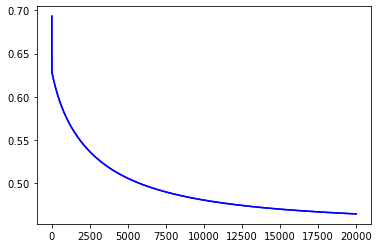

In [11]:
theta = np.zeros((X_train.shape[1],Y_train.shape[1]))
learning_rate = 0.003
no_of_iterations = 20000

m=X_train.shape[0]
i = 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def logistic_regression(X_train,Y_train,theta,iteration,learning_rate):
    cost_arr = np.empty((0,Y_train.shape[1]))
    for i in range(0,no_of_iterations):
        lineq = np.dot(X_train, theta)
        h = sigmoid(lineq)
        cost = -1/m * ((Y_train * np.log(h)) + ((1-Y_train) * np.log(1-h)))
        cost = cost.sum(axis = 0)
        cost_arr = np.vstack((cost_arr, cost))
        delta = (learning_rate/m) * np.dot((h-Y_train).T, X_train)
        theta = theta - delta.T  
    return theta,cost_arr
theta,cost_arr=logistic_regression(X_train,Y_train,theta,no_of_iterations,learning_rate)
plt.plot(cost_arr[:,0:2], label='class 0', c='b')

In [12]:
model_predict = sigmoid(np.dot(X_test, theta))
predict = np.zeros((X_test.shape[0],1))
for row in range(len(model_predict)):
    max_ind=-1
    max_val=-1
    for i in range(0,len(model_predict[row])):
        if model_predict[row][i]>max_val:
            max_val=model_predict[row][i]
            max_ind=i
    predict[row]=max_ind

In [13]:
Y_test_label=[np.where(r==1)[0][0] for r in Y_test]
Y_test_label=np.array(Y_test_label)
count1=0
for i in range(0,len(predict)):
    if predict[i]==Y_test_label[i]:
        count1+=1
print("Accuracy",count1/X_test.shape[0])
    

Accuracy 0.7821229050279329


In [14]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test_label, predict))

Confusion Matrix
[[90 15]
 [24 50]]


In [15]:
from sklearn.metrics import classification_report
print("classification Report")
print(classification_report(Y_test_label, predict))

classification Report
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       105
           1       0.77      0.68      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Text(0.5, 15.0, 'Predicted class')

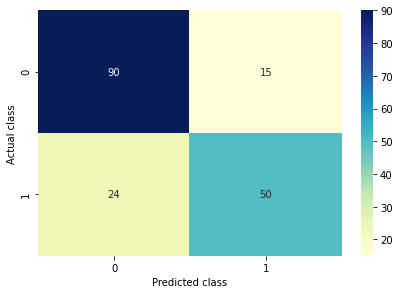

In [20]:
classLabels=[]
conf=confusion_matrix(Y_test_label, predict)
fig, ax21 = plt.subplots()
i=0
while(i<10):
    classLabels.append(i)
    i+=1
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="YlGnBu" ,fmt='g')
ax21.xaxis.set_label_position("bottom")
plt.ylabel('Actual class')
plt.tight_layout()
plt.xlabel('Predicted class')
